# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [82]:
import numpy as np
import matplotlib.pyplot as plt


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [83]:
# données
data = np.genfromtxt('data.csv', delimiter=',')
data.shape

(97, 2)

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.


Dans la regression lineaire, nous avons une formule qui ressemble a ceci : y= θ0+θ1*x, ou θ0 est l'ordonnee a l'origine ( ou intercept) et θ1 est la pente de la ligne. L'ordonnee a l'origine est la valeur de y lorsque x=0.

In [84]:
data.shape[0]

97

Step 1: Adding 
𝜃
0
θ 
0
​
  (Intercept) to the Feature Matrix
To handle 
𝜃
0
θ 
0
​
 , we add a column of ones to the feature matrix 
𝑋
X.
This ensures that 
𝜃
0
θ 
0
​
  is multiplied by 1 in the computation.

In [101]:
# rajoutons l'ordonnée à l'origine theta 0 : creates a column vector filled with ones, having the same number of rows as data
intercept=np.ones((data.shape[0],1)) #  (the intercept) is added explicitly by inserting a column of ones into the dataset.
# The first column contains ones (for the intercept).
# The second column contains the original feature values.
X=np.column_stack((intercept,data[:,0])) 
print (X.shape)
y = data[:, 1]
y = y.reshape(-1, 1)  #  y est de forme (97,1)



(97, 2)


Text(0, 0.5, 'Bénéfice x1000')

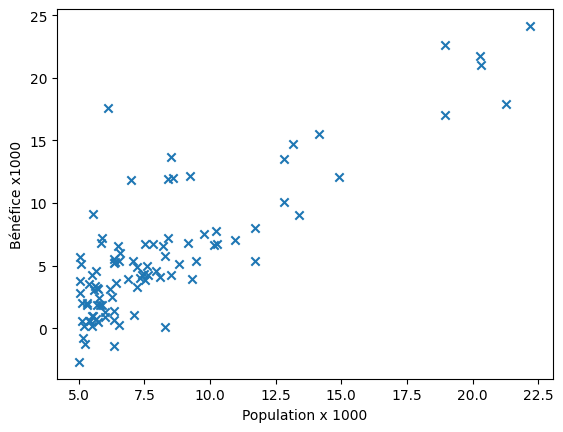

In [86]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout 

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

La fonction de coût mesure l'erreur entre les prédictions du modèle et les valeurs réelles des données d'entraînement. **L'objectif de l'optimisation est de minimiser cette fonction de coût afin d'obtenir les paramètres du modèle qui produisent les prédictions les plus précises**

Le tracé du coût consiste à enregistrer la valeur de la fonction de coût à chaque itération de l'algorithme d'optimisation et à représenter graphiquement ces valeurs sur un graphique. Généralement, l'axe des abscisses représente le nombre d'itérations, tandis que l'axe des ordonnées représente la valeur de la fonction de coût.

# Breakdown of the Function

## 1. Inputs  
- **X**: The feature matrix (including the intercept column of ones).  
- **y**: The target variable (output values).  
- **theta**: The parameter vector (\(\theta\)).  

## 2. Cost Function Formula  

The cost function for linear regression is given by:  

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x_i) - y_i)^2
$$  
**Where:**  
- \( m \) is the number of training examples.  
- \( h_{\theta}(x_i) = X_i \cdot \theta \) is the hypothesis (predicted value).  
- \( y_i \) is the actual output. 
  


## 3. Implementation Without Vectorization  
1. Use a loop to iterate through each training example.  
2. Compute the squared error for each example.  
3. Sum all squared errors and divide by \( 2m \).  

## 4. Measure Execution Time  
- Use `time.time()` to compare start and end times.  


In [103]:
import time

def computeCostNonVect(X, y, theta):
    """
    Compute the cost function for linear regression without vectorization.

    Parameters:
    X : numpy array (m, n) -> Feature matrix (including intercept column)
    y : numpy array (m,)   -> Target variable
    theta : numpy array (n,) -> Parameter vector

    Returns:
    J : float -> Computed cost
    """
    m = len(y)  # Number of training examples
    J = 0  # Initialize cost

    start_time = time.time()  # Start timing

    # Compute cost without vectorization
    for i in range(m):
        h_i = np.dot(X[i], theta)  # Compute hypothesis (dot product) : scalar product of vectors
        J += (h_i - y[i]) ** 2  # Squared error

    J = J / (2 * m)  # Final cost value

    end_time = time.time()  # End timing
    print(f"Execution time: {end_time - start_time:.6f} seconds")

    return J


Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Explication du Code

## 1. Vectorisation complète  
- \( h_{\theta} = X \cdot \theta \) : Calcul des prédictions en une seule opération matricielle.  

- La fonction de coût est donnée par :  

  $$
  J(\theta) = \frac{1}{2m} \sum (h_{\theta} - y)^2
  $$  

  Cette expression est évaluée en une seule ligne grâce à `np.dot()`.  

## 2. Temps d'exécution  
- On utilise `time.time()` pour mesurer le temps de traitement et voir si l’optimisation par vectorisation est efficace.  

## 3. Suppression des boucles  
- Contrairement à une implémentation naïve avec des `for` loops, ici tout est fait via des opérations matricielles rapides.  


In [ ]:
def computeCost(X, y, theta):
    """
    Compute the cost function for linear regression using vectorized operations.
    
    Parameters:
    X : numpy array of shape (m, n+1) - Feature matrix with an added intercept column.
    y : numpy array of shape (m, 1) - Target values.
    theta : numpy array of shape (n+1, 1) - Parameter vector.
    
    Returns:
    J : float - The computed cost.
    """
    m = len(y)  # Number of training examples
    
    start_time = time.time()  # Start timing
    
    # Hypothesis: h_theta = X * theta (vectorized)
    predictions = X.dot(theta)
    
    # Compute squared errors
    errors = predictions - y
    squared_errors = np.dot(errors.T, errors)  # Equivalent to sum((h_theta - y)^2), errors.T transpose of the errors vector
    
    # Compute cost function J(theta)
    J = (1 / (2 * m)) * squared_errors
    
    end_time = time.time()  # End timing
    
    print(f"Execution Time: {end_time - start_time:.6f} seconds")
    
    return J[0, 0]  # Return as a scalar


2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

### Step 3: Optimizing \( \theta \) with Gradient Descent

To find the best values for \( \theta \), we use **gradient descent**:

$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
$$

#### Where:
- \( \alpha \) is the **learning rate**.
- \( \frac{\partial J(\theta)}{\partial \theta_j} \) is the **gradient** (direction of steepest descent).

---

### Gradient Formula

The gradient for each \( \theta_j \) is given by:

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left(h_{\theta}(x^{(i)}) - y^{(i)}\right) x_j^{(i)}
$$

---

### 💡 Intuition
- We update \( \theta \) values **step by step** until the cost function is minimized.
- If \( \alpha \) is **too large**, the model may **overshoot** the minimum.
- If \( \alpha \) is **too small**, the model will learn **too slowly**.


In [ ]:
def gradientDescent(X, y, theta, alpha, iterations):
    """
    Perform gradient descent to learn theta.

    Parameters:
    X : numpy array of shape (m, n+1) - Feature matrix with an added intercept column.
    y : numpy array of shape (m, 1) - Target values.
    theta : numpy array of shape (n+1, 1) - Initial parameter vector.
    alpha : float - Learning rate.
    iterations : int - Number of iterations.

    Returns:
    theta : numpy array - Optimized parameter vector.
    cost_history : list - Cost at each iteration.
    """
    m = len(y)  # Number of training examples
    cost_history = []  # List to store cost at each iteration

    for i in range(iterations):
        # Compute hypothesis (h_theta = X * theta)
        predictions = X.dot(theta)
        
        # Compute gradient descent step
        errors = predictions - y
        gradient = (1 / m) * X.T.dot(errors)
        theta = theta - alpha * gradient  # Update theta

        # Compute and store the cost at each iteration
        cost = (1 / (2 * m)) * np.dot(errors.T, errors)
        cost_history.append(cost[0, 0])  # Store cost as a scalar : the dot product of two column vectors (one transposed) results in a 2D matrix with just one value, so we need to access that value.

        # Optionally, print progress
        if i % (iterations // 10) == 0:  # Print every 10% of progress
            print(f"Iteration {i}: Cost = {cost[0,0]:.6f}")

    return theta, cost_history


# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [90]:
theta = np.zeros((2, 1))

Calculer le cout initial

In [111]:
initialCost=computeCost(X, y, theta)
print(initialCost)

Execution Time: 0.018871 seconds
32.072733877455676


Appel des la fonction de calcul du gradient

In [113]:
theta = np.zeros((2, 1))
# paramètres
iterations = 1500
alpha = 0.01
# Appel
theta, cost_history = gradientDescent(X, y, theta, alpha, iterations)
# print(theta)

Iteration 0: Cost = 32.072734
Iteration 150: Cost = 5.314397
Iteration 300: Cost = 4.964362
Iteration 450: Cost = 4.760638
Iteration 600: Cost = 4.642068
Iteration 750: Cost = 4.573060
Iteration 900: Cost = 4.532896
Iteration 1050: Cost = 4.509520
Iteration 1200: Cost = 4.495915
Iteration 1350: Cost = 4.487997


Traçage de la ligne de régression sur les données

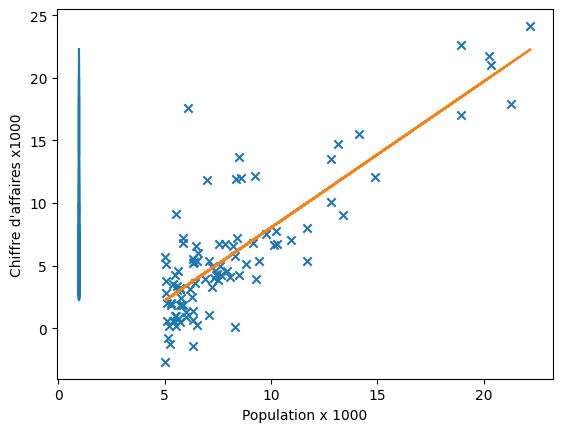

In [117]:
y_pred=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,y_pred)
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

Traçage du coût en fonction de $\theta_0$ et $\theta_1$ \\
Ce type de graphique aide à **visualiser l'évolution de la descente de gradient** vers un **minimum global**.  
Plus les courbes sont **proches**, plus la pente est forte (descente rapide).  
Le but de l’optimisation est d'**atteindre le centre** (où \( J(\theta) \) est minimal).  

---

🔹 **Pourquoi parle-t-on de cercles ?**  
Ce graphique représente des **courbes de niveau** de la fonction de coût \( J(\theta) \).  

- Chaque **ligne** correspond à une valeur constante de \( J(\theta) \) (comme des courbes d'altitude sur une carte topographique).  
- Plus on s'approche du **centre**, plus le coût diminue.  
- Les courbes ont une **forme elliptique** ici, car la descente de gradient est influencée par la distribution des données.  
- **Si les données étaient parfaitement normalisées, les courbes seraient des cercles parfaits** (ce qui arrive quand les variables sont de même échelle).  

---

🔹 **Que représente le centre des courbes ?**  
Le centre des ellipses est le **point où \( J(\theta) \) est minimal**, c'est-à-dire **les valeurs optimales de \( \theta_0 \) et \( \theta_1 \)**.  
C'est la solution recherchée par la **descente de gradient** !  


C:\Users\moous\AppData\Local\Temp\ipykernel_3788\2252110522.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J_vals[i, j] = computeCost(X, y, theta)


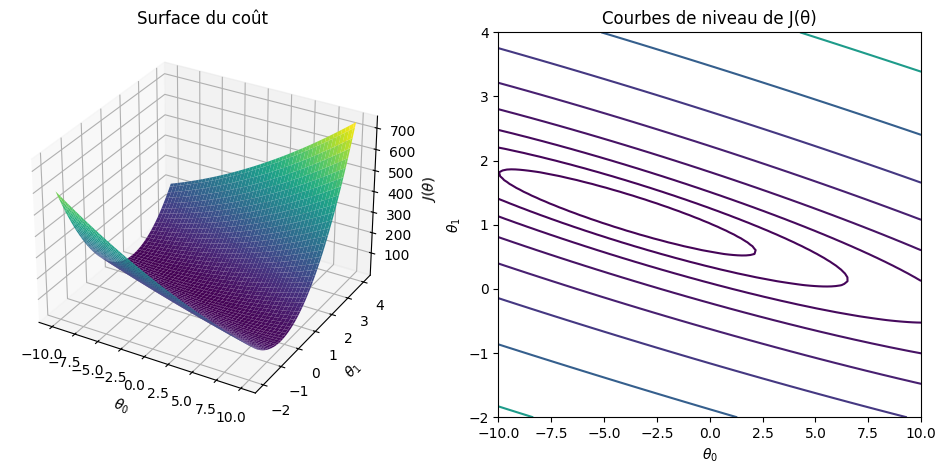

In [123]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plotCostFunction(X, y):
    """ Tracé de la surface du coût J(θ0, θ1) """
    
    # Définir les valeurs de θ0 et θ1 sur une grille
    theta0_vals = np.linspace(-10, 10, 100)
    theta1_vals = np.linspace(-2, 4, 100)
    
    J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))  # Matrice des coûts
    
    # Calculer J pour chaque paire (theta0, theta1)
    for i, theta0 in enumerate(theta0_vals):
        for j, theta1 in enumerate(theta1_vals):
            theta = np.array([[theta0], [theta1]])  # Theta sous forme de matrice (2,1)
            J_vals[i, j] = computeCost(X, y, theta)
    
    # Créer les grilles de θ0 et θ1
    Theta0, Theta1 = np.meshgrid(theta0_vals, theta1_vals)
    
    # Tracé en 3D
    fig = plt.figure(figsize=(12, 5))

    # -------- Graphique 3D --------
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(Theta0, Theta1, J_vals.T, cmap='viridis')
    ax1.set_xlabel(r'$\theta_0$')
    ax1.set_ylabel(r'$\theta_1$')
    ax1.set_zlabel(r'$J(\theta)$')
    ax1.set_title("Surface du coût")

    # -------- Contour Plot --------
    ax2 = fig.add_subplot(122)
    ax2.contour(Theta0, Theta1, J_vals.T, levels=np.logspace(-2, 3, 20), cmap='viridis')
    ax2.set_xlabel(r'$\theta_0$')
    ax2.set_ylabel(r'$\theta_1$')
    ax2.set_title("Courbes de niveau de J(θ)")
    
    plt.show()


# Affichage du coût en fonction de θ0 et θ1
plotCostFunction(X, y)


Traçage du coût en fonction du nombre d'itérations

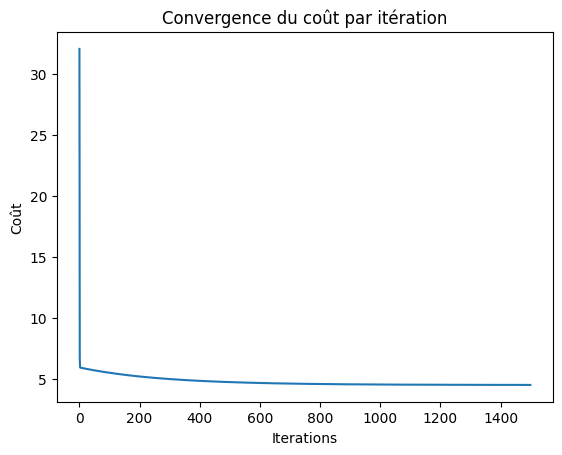

In [124]:
# Traçage du coût en fonction du nombre d'itérations
plt.plot(range(iterations), cost_history )
plt.xlabel('Iterations')
plt.ylabel('Coût')
plt.title('Convergence du coût par itération')
plt.show()

Prédire des valeurs de y

In [ ]:
# Predire pour une population = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta)
predict1

array([0.45197679])

In [122]:
predict2 = np.matmul([1, 7],theta)
predict2

array([4.53424501])

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [128]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',')
dataMulti.shape


(47, 3)

In [133]:
#  rajoutons l'ordonnée à l'origine theta 0 : creates a column vector filled with ones, having the same number of rows as data (shape[0])
X = np.concatenate([np.ones((dataMulti.shape[0], 1)), dataMulti[:, 0:2]], axis=1) # Adds 2 columns of features, axis = 1 meaning colonne supplementaire a gauche
print (X.shape) # taille maison ; nombre de chambres
y = dataMulti[:, 2] # price is target variable
print(X[0])

(47, 3)
[1.000e+00 2.104e+03 3.000e+00]


Text(0, 0.5, 'Price')

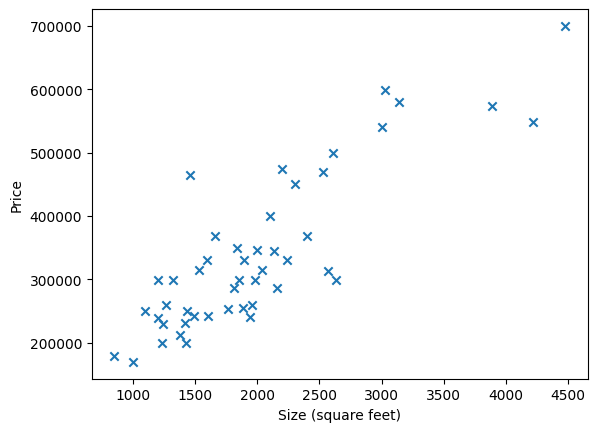

In [134]:
# traçons ces données pour visualisation
# La taille est une variable continue et plus corrélée avec le prix.
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Size (square feet)')
plt.ylabel('Price')

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [ ]:
# d'abord créer X et y : on ne change pas a part y we have to do reshape a cause du produit dot matriciel
print(X.shape)
y = y.reshape(-1, 1)  #  y est de forme (47,1)
print(y.shape)

(47, 3)
(47, 1)


In [ ]:
# redéfinissez vos fonctions de coût si cela est necessaire


Normalisation des données:
$x_i = \frac{x_i - \mu_i}{\sigma_i}$
x 
i
​
  est une valeur de la caractéristique.
𝜇
𝑖
μ 
i
​
  est la moyenne des valeurs de la caractéristique 
𝑖
i.
𝜎
𝑖
σ 
i
​
  est l'écart-type des valeurs de la caractéristique 
𝑖
i.

In [139]:
def featureNormalization(X):
    """
    Normalise chaque feature en soustrayant la moyenne et en divisant par l'écart-type.
    
    Paramètres :
    X : numpy array de taille (m, n), où m est le nombre d'exemples et n le nombre de caractéristiques.

    Retourne :
    X_norm : numpy array de même taille que X, normalisé.
    """
    mu = np.mean(X, axis=0)  # Moyenne de chaque colonne (feature)
    sigma = np.std(X, axis=0)  # Écart-type de chaque colonne (feature)
    
    X_norm = (X - mu) / sigma  # Normalisation
    
    return X_norm


Appliquer la descente du gradient à plusieurs variables

In [149]:
X_norm = featureNormalization(X[:, 1:])  # Normalisation des features (ignorer la colonne d'interception)
X_norm = np.column_stack((np.ones(X_norm.shape[0]), X_norm))  # Ajouter la colonne d'interception

Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul

### AVEC NORMALISATION

In [165]:
theta = np.zeros((3, 1)) # (n+1, 1) avec n = 2
# paramètres
iterations = 2000
alpha = 0.01
# Appel
# Appliquer la descente du gradient avec normalisation
start_time = time.time()
theta_with_scaling, cost_history_with_scaling = gradientDescent(X_norm, y, theta, alpha, iterations)
end_time = time.time()

print("Temps d'exécution de la descente du gradient avec plusieurs variables avec normalisation :", end_time - start_time)

print("theta :", theta)

Iteration 0: Cost = 65591585744.680847
Iteration 200: Cost = 3344771242.500434
Iteration 400: Cost = 2105448645.388034
Iteration 600: Cost = 2051066897.774293
Iteration 800: Cost = 2044563307.763521
Iteration 1000: Cost = 2043499374.521983
Iteration 1200: Cost = 2043317970.045471
Iteration 1400: Cost = 2043286901.666046
Iteration 1600: Cost = 2043281578.221579
Iteration 1800: Cost = 2043280666.025537
Temps d'exécution de la descente du gradient avec plusieurs variables avec normalisation : 0.05778050422668457
theta : [[0.]
 [0.]
 [0.]]


### SANS NORMALISATION

In [166]:
theta = np.zeros((3, 1)) # (n+1, 1) avec n = 2
# paramètres
iterations = 2000
alpha = 0.01
# Appel
# Appliquer la descente du gradient sans normalisation
start_time = time.time()
theta_without_scaling, cost_history_without_scaling = gradientDescent(X, y, theta, alpha, iterations)
end_time = time.time()

print("Temps d'exécution de la descente du gradient avec plusieurs variables sans normalisation :", end_time - start_time)

print(theta)

Iteration 0: Cost = 65591585744.680847
Iteration 200: Cost = nan
Iteration 400: Cost = nan
Iteration 600: Cost = nan
Iteration 800: Cost = nan
Iteration 1000: Cost = nan
Iteration 1200: Cost = nan
Iteration 1400: Cost = nan
Iteration 1600: Cost = nan
Iteration 1800: Cost = nan
Temps d'exécution de la descente du gradient avec plusieurs variables sans normalisation : 0.05843091011047363
[[0.]
 [0.]
 [0.]]


C:\Users\moous\AppData\Local\Temp\ipykernel_3788\688292602.py:26: RuntimeWarning: invalid value encountered in subtract
  theta = theta - alpha * gradient  # Update theta


In [167]:
# Comparer les algorithmes de descente du gradient avec et sans normalisation
# Calculer le pourcentage de convergence pour la descente du gradient sans normalisation
convergence_percentage_no_scaling = (1 - cost_history_without_scaling[-1] / cost_history_without_scaling[0]) * 100

# Calculer le pourcentage de convergence pour la descente du gradient avec normalisation
convergence_percentage_with_scaling = (1 - cost_history_with_scaling[-1] / cost_history_with_scaling[0]) * 100

print("Pourcentage de convergence sans normalisation:", convergence_percentage_no_scaling)
print("Pourcentage de convergence avec normalisation:", convergence_percentage_with_scaling)

Pourcentage de convergence sans normalisation: nan
Pourcentage de convergence avec normalisation: 96.8848435560686


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

Coefficients du modèle scikit-learn (sans normalisation):
Intercept: 89597.76596099924
Coefficients: [  139.21063465 -8737.91542019]
Coût initial (sans normalisation): 7651160131.281121
Coût final (sans normalisation): 2043280477.3925703
Temps d'exécution de la régression linéaire avec scikit-learn: 0.00891876220703125


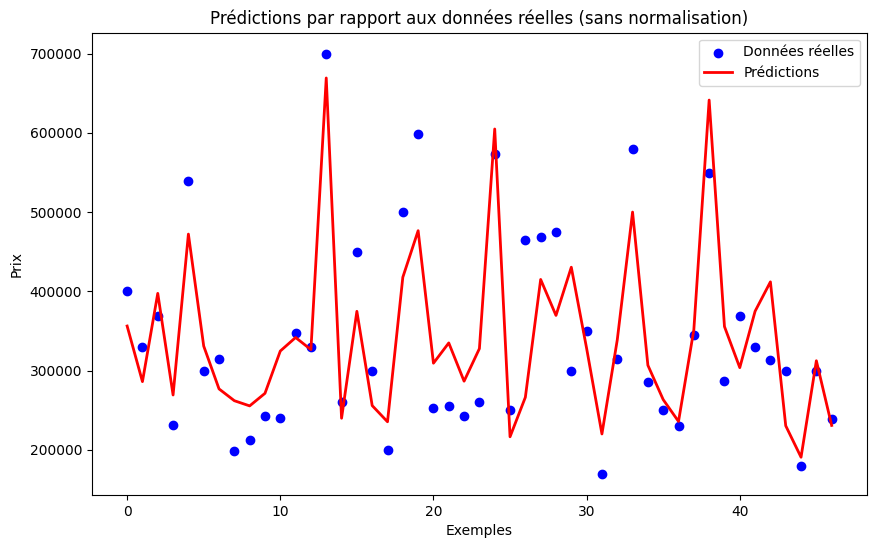

In [168]:
from sklearn.linear_model import LinearRegression

# Charger les données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',')

# Séparer les caractéristiques (X) et les étiquettes (y)
X = dataMulti[:, :2]  # Caractéristiques : supérficie et nombre de chambres
y = dataMulti[:, 2]   # Étiquettes : prix de la maison

# Initialiser le modèle de régression linéaire de scikit-learn
model = LinearRegression()

# Temps d'exécution et entraînement du modèle avec les données non normalisées
start_time = time.time()
model.fit(X, y)
end_time = time.time()

# Afficher les coefficients du modèle
print("Coefficients du modèle scikit-learn (sans normalisation):")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Prédiction des étiquettes avec le modèle entraîné
y_pred = model.predict(X)

# Calculer le coût initial et final
initial_cost = np.mean((y - np.mean(y_pred)) ** 2) / 2
final_cost = np.mean((y - y_pred) ** 2) / 2

print("Coût initial (sans normalisation):", initial_cost)
print("Coût final (sans normalisation):", final_cost)

# Temps d'exécution de la régression linéaire avec scikit-learn
print("Temps d'exécution de la régression linéaire avec scikit-learn:", end_time - start_time)

# Tracer la courbe des coûts
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Données réelles')
plt.plot(range(len(y)), y_pred, color='red', linewidth=2, label='Prédictions')
plt.xlabel('Exemples')
plt.ylabel('Prix')
plt.title('Prédictions par rapport aux données réelles (sans normalisation)')
plt.legend()
plt.show()

Temps d'exécution de la régression linéaire avec scikit-learn: 0.001081705093383789
Coefficients du modèle scikit-learn (avec normalisation et mise à l'échelle):
Intercept: 199467.31126290312
Coefficients: [504777.76124214 -34951.66168075]
Coût initial (avec normalisation et mise à l'échelle): 7651160131.281121
Coût final (avec normalisation et mise à l'échelle): 2043280477.3925703


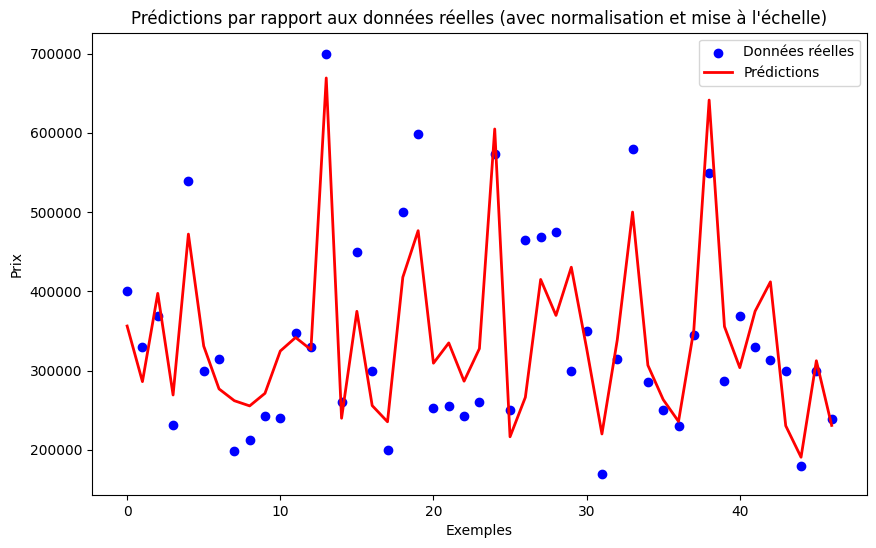

In [172]:
import numpy as np
import time
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Charger les données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=int)

# Séparer les caractéristiques (X) et les étiquettes (y)
X = dataMulti[:, :2]  # Caractéristiques : supérficie et nombre de chambres
y = dataMulti[:, 2]   # Étiquettes : prix de la maison

# Normalisation des données en moyenne = 0
def mean_normalization(X):
    X_normalized = X - np.mean(X, axis=0)
    return X_normalized

X_normalized = mean_normalization(X)

# Mise à l'échelle des données dans l'intervalle [0,1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_normalized)

# Initialiser le modèle de régression linéaire de scikit-learn
model = LinearRegression()

# Temps d'exécution et entraînement du modèle avec les données normalisées et mises à l'échelle
start_time = time.time()
model.fit(X_scaled, y)
end_time = time.time()

# Temps d'exécution de la régression linéaire avec scikit-learn
print("Temps d'exécution de la régression linéaire avec scikit-learn:", end_time - start_time)


# Afficher les coefficients du modèle
print("Coefficients du modèle scikit-learn (avec normalisation et mise à l'échelle):")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Prédiction des étiquettes avec le modèle entraîné
y_pred = model.predict(X_scaled)

# Calculer le coût initial et final
initial_cost = np.mean((y - np.mean(y_pred)) ** 2) / 2
final_cost = np.mean((y - y_pred) ** 2) / 2

print("Coût initial (avec normalisation et mise à l'échelle):", initial_cost)
print("Coût final (avec normalisation et mise à l'échelle):", final_cost)

# Tracer la courbe des coûts
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Données réelles')
plt.plot(range(len(y)), y_pred, color='red', linewidth=2, label='Prédictions')
plt.xlabel('Exemples')
plt.ylabel('Prix')
plt.title('Prédictions par rapport aux données réelles (avec normalisation et mise à l\'échelle)')
plt.legend()
plt.show()

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

- Augmentation de données
- validation croisée
- Bagging (Bootstrap Aggregating) :
Le bagging consiste à entraîner plusieurs modèles d'apprentissage indépendants sur des sous-ensembles aléatoires de données (échantillons bootstrap) tirés du jeu de données d'entraînement. Ensuite, les prédictions de ces modèles individuels sont combinées par moyenne (pour la régression) ou par vote majoritaire (pour la classification) pour obtenir la prédiction finale. Le bagging réduit la variance et le risque de surajustement, car les modèles sont entraînés sur des sous-ensembles de données différents.
- tester d'autres modeles comme les randoms forests